In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

data = pd.read_csv("AmesHousing.txt",delimiter = "\t")

In [3]:
pd.options.display.max_columns = None

In [4]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
data = data.sort_values("Yr Sold")

In [6]:
null_count = data.isnull().sum()

In [7]:
dlt = null_count[null_count>data.shape[0]/20].index
data.drop(dlt, axis = 1, inplace = True)

In [8]:
obj_null = data.select_dtypes(object).isnull().sum()
dlt_obj = obj_null[obj_null>0].index
data.drop(dlt_obj, axis = 1, inplace = True)

In [9]:
num_null = data.select_dtypes([np.int64, np.float64]).isnull().sum()
missing_num = num_null[num_null>0].index
fill = data[missing_num].mode().to_dict(orient = "record")[0]
data.fillna(fill, inplace = True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:1554: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


In [10]:
years_sold = data['Yr Sold'] - data['Year Built']
years_sold [years_sold<0]

2180   -1
dtype: int64

In [11]:
years_rmd = data['Yr Sold'] - data['Year Remod/Add']
years_rmd[years_rmd<0]

1702   -1
2181   -1
2180   -2
dtype: int64

In [12]:
data["Years Before Sale"] = years_sold
data["Years Since Remod"] = years_rmd

In [13]:
data.drop([1702, 2180,2181], axis = 0,inplace = True)

In [14]:
data.drop(['Year Built','Year Remod/Add'], axis = 1, inplace = True)

In [15]:
data.drop(["Order","PID"], axis = 1, inplace = True)

In [16]:
data_leak = ['Mo Sold', 'Yr Sold', 'Sale Type','Sale Condition']
data.drop(data_leak,axis = 1, inplace = True)

In [17]:
obj = data.select_dtypes(object)
obj.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive
2929,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,TA,TA,PConc,GasA,Ex,Y,TA,Typ,Y
2515,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
2514,FV,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,Hip,CompShg,Wd Sdng,Wd Sdng,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
2513,FV,Pave,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y
2512,FV,Pave,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,Twnhs,2Story,Gable,CompShg,MetalSd,MetalSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y


In [18]:
uniq = obj.apply(lambda col: len(col.unique())).sort_values(ascending = False)
rmv_uniq = uniq[uniq>10].index
data.drop(rmv_uniq, axis = 1, inplace = True)

In [19]:
obj_col = data.select_dtypes(object).columns
obj_col

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive'],
      dtype='object')

In [20]:
data[obj_col] = data[obj_col].astype("category")

In [21]:
for i in obj_col:
    data[i] = data[i].cat.codes

In [22]:
data.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
2929,60,5,9627,1,3,3,0,4,1,2,2,0,5,7,5,1,1,94.0,3,4,2,758.0,0.0,238.0,996.0,1,0,1,996,1004,0,2000,0.0,0.0,2,1,3,1,4,9,7,1,3.0,650.0,2,190,48,0,0,0,0,0,188000,13,12
2515,20,2,7180,1,0,3,0,4,0,2,2,0,2,8,5,1,1,0.0,2,4,2,0.0,0.0,1568.0,1568.0,1,0,1,1568,0,0,1568,0.0,0.0,2,0,3,1,2,6,7,1,2.0,564.0,2,0,266,0,0,0,0,0,221000,5,4
2514,60,2,8314,1,0,3,0,0,0,2,2,0,5,7,5,3,1,0.0,2,4,2,0.0,0.0,569.0,569.0,1,0,1,854,840,0,1694,0.0,0.0,2,1,3,1,2,6,7,1,1.0,434.0,2,0,382,0,0,110,0,0,200000,9,8
2513,160,2,4447,1,0,3,0,2,0,2,2,4,5,7,5,1,1,0.0,2,4,2,0.0,0.0,530.0,530.0,1,0,1,530,550,0,1080,0.0,0.0,2,1,2,1,2,4,7,0,2.0,496.0,2,0,50,0,0,0,0,0,139000,3,3
2512,160,2,2651,1,3,3,0,2,0,2,2,3,5,7,5,1,1,0.0,2,4,2,641.0,0.0,32.0,673.0,1,0,1,673,709,0,1382,1.0,0.0,2,1,3,1,2,6,7,0,2.0,490.0,2,153,50,0,0,0,0,0,165000,6,6


In [23]:
cor = data.corr()["SalePrice"].abs().sort_values(ascending = False)
retained = cor[cor>0.25].index
retained

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Kitchen Qual',
       'Years Before Sale', 'Full Bath', 'Years Since Remod', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Heating QC',
       'Foundation', 'Wood Deck SF', 'Open Porch SF', 'Lot Shape', 'Half Bath',
       'Bsmt Full Bath', 'Paved Drive', '2nd Flr SF', 'Lot Area',
       'Central Air', 'Roof Style'],
      dtype='object')

In [24]:
data = data[retained]

In [25]:
data.head()

,SalePrice,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Kitchen Qual,Years Before Sale,Full Bath,Years Since Remod,Mas Vnr Area,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Heating QC,Foundation,Wood Deck SF,Open Porch SF,Lot Shape,Half Bath,Bsmt Full Bath,Paved Drive,2nd Flr SF,Lot Area,Central Air,Roof Style
2929,188000,7,2000,3,3.0,996.0,650.0,996,4,13,2,12,94.0,9,1,758.0,0,2,190,48,3,1,0.0,2,1004,9627,1,1
2515,221000,8,1568,2,2.0,1568.0,564.0,1568,2,5,2,4,0.0,6,1,0.0,0,2,0,266,0,0,0.0,2,0,7180,1,1
2514,200000,7,1694,2,1.0,569.0,434.0,854,2,9,2,8,0.0,6,1,0.0,0,2,0,382,0,1,0.0,2,840,8314,1,3
2513,139000,7,1080,2,2.0,530.0,496.0,530,2,3,2,3,0.0,4,0,0.0,0,2,0,50,0,1,0.0,2,550,4447,1,1
2512,165000,7,1382,2,2.0,673.0,490.0,673,2,6,2,6,0.0,6,0,641.0,0,2,153,50,3,1,1.0,2,709,2651,1,1


In [26]:
c = data.corr().abs()

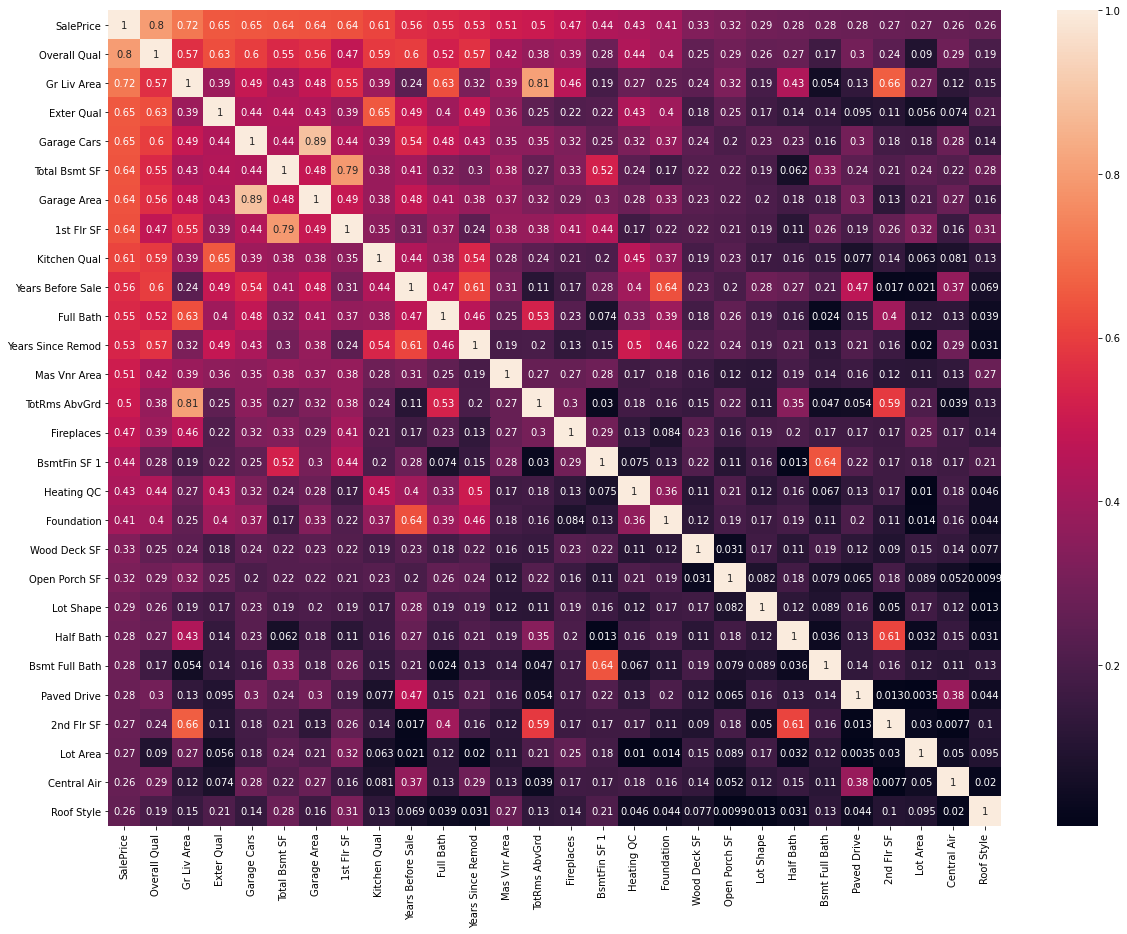

In [27]:
import seaborn as sns

plt.figure(figsize = (20,15))
sns.heatmap(c, annot = True)
plt.show()

In [28]:
data.drop(['TotRms AbvGrd','Garage Cars','1st Flr SF'], axis = 1, inplace = True)

In [29]:
hetro = data.copy()
hetro = (hetro-hetro.min())/(hetro.max()- hetro.min())
var = hetro.var().sort_values(ascending = False)
var

Lot Shape            0.221358
Heating QC           0.190126
Years Since Remod    0.120806
Kitchen Qual         0.100424
Paved Drive          0.071995
Half Bath            0.063125
Central Air          0.062500
Exter Qual           0.054263
Years Before Sale    0.049585
2nd Flr SF           0.042953
Bsmt Full Bath       0.030597
Roof Style           0.026833
Fireplaces           0.026216
Overall Qual         0.024461
Foundation           0.021101
Garage Area          0.020827
Full Bath            0.019077
Mas Vnr Area         0.012250
SalePrice            0.011593
Gr Liv Area          0.008794
Open Porch SF        0.008018
Wood Deck SF         0.007844
BsmtFin SF 1         0.006348
Total Bsmt SF        0.005022
Lot Area             0.001345
dtype: float64

In [30]:
final_col = var[var>0.01].index

In [31]:
data = data[final_col]

In [32]:
data.head()

,Lot Shape,Heating QC,Years Since Remod,Kitchen Qual,Paved Drive,Half Bath,Central Air,Exter Qual,Years Before Sale,2nd Flr SF,Bsmt Full Bath,Roof Style,Fireplaces,Overall Qual,Foundation,Garage Area,Full Bath,Mas Vnr Area,SalePrice
2929,3,0,12,4,2,1,1,3,13,1004,0.0,1,1,7,2,650.0,2,94.0,188000
2515,0,0,4,2,2,0,1,2,5,0,0.0,1,1,8,2,564.0,2,0.0,221000
2514,0,0,8,2,2,1,1,2,9,840,0.0,3,1,7,2,434.0,2,0.0,200000
2513,0,0,3,2,2,1,1,2,3,550,0.0,1,0,7,2,496.0,2,0.0,139000
2512,3,0,6,2,2,1,1,2,6,709,1.0,1,0,7,2,490.0,2,0.0,165000


In [33]:
sale_price = data["SalePrice"]

In [34]:
data = (data-data.min())/(data.max()-data.min())

In [35]:
data["SalePrice"] = sale_price

In [36]:
data.head()

,Lot Shape,Heating QC,Years Since Remod,Kitchen Qual,Paved Drive,Half Bath,Central Air,Exter Qual,Years Before Sale,2nd Flr SF,Bsmt Full Bath,Roof Style,Fireplaces,Overall Qual,Foundation,Garage Area,Full Bath,Mas Vnr Area,SalePrice
2929,1.0,0.0,0.200000,1.0,1.0,0.5,1.0,1.000000,0.095588,0.486199,0.000000,0.2,0.25,0.666667,0.4,0.436828,0.5,0.05875,188000
2515,0.0,0.0,0.066667,0.5,1.0,0.0,1.0,0.666667,0.036765,0.000000,0.000000,0.2,0.25,0.777778,0.4,0.379032,0.5,0.00000,221000
2514,0.0,0.0,0.133333,0.5,1.0,0.5,1.0,0.666667,0.066176,0.406780,0.000000,0.6,0.25,0.666667,0.4,0.291667,0.5,0.00000,200000
2513,0.0,0.0,0.050000,0.5,1.0,0.5,1.0,0.666667,0.022059,0.266344,0.000000,0.2,0.00,0.666667,0.4,0.333333,0.5,0.00000,139000
2512,1.0,0.0,0.100000,0.5,1.0,0.5,1.0,0.666667,0.044118,0.343341,0.333333,0.2,0.00,0.666667,0.4,0.329301,0.5,0.00000,165000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 2929 to 0
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lot Shape          2927 non-null   float64
 1   Heating QC         2927 non-null   float64
 2   Years Since Remod  2927 non-null   float64
 3   Kitchen Qual       2927 non-null   float64
 4   Paved Drive        2927 non-null   float64
 5   Half Bath          2927 non-null   float64
 6   Central Air        2927 non-null   float64
 7   Exter Qual         2927 non-null   float64
 8   Years Before Sale  2927 non-null   float64
 9   2nd Flr SF         2927 non-null   float64
 10  Bsmt Full Bath     2927 non-null   float64
 11  Roof Style         2927 non-null   float64
 12  Fireplaces         2927 non-null   float64
 13  Overall Qual       2927 non-null   float64
 14  Foundation         2927 non-null   float64
 15  Garage Area        2927 non-null   float64
 16  Full Bath          2927 

In [38]:
features = data.columns.drop("SalePrice")
target = "SalePrice"

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [40]:
kf = KFold(10, True, 123)
model = LinearRegression()

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass shuffle=True, random_state=123 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [41]:
rmses = []

for train_index, test_index in kf.split(data):
    train = data.iloc[train_index]
    test = data.iloc[test_index]
    model.fit(train[features], train[target])
    prediction = model.predict(test[features])
    mse = mean_squared_error(prediction, test[target])
    rmse = np.sqrt(mse)
    rmses.append(rmse)

In [42]:
rmses

[36808.917269174606,
 28978.38146849531,
 39504.74877791166,
 31615.09142406873,
 35181.84272674693,
 46084.93123441949,
 34105.9393891336,
 32369.571574983594,
 33401.289286449224,
 36490.135586205615]

In [43]:
avg_rmses = np.mean(rmses)
avg_rmses

35454.084873758875

In [44]:
test["p_price"] = prediction

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
test

,Lot Shape,Heating QC,Years Since Remod,Kitchen Qual,Paved Drive,Half Bath,Central Air,Exter Qual,Years Before Sale,2nd Flr SF,Bsmt Full Bath,Roof Style,Fireplaces,Overall Qual,Foundation,Garage Area,Full Bath,Mas Vnr Area,SalePrice,p_price
2515,0.0,0.00,0.066667,0.5,1.0,0.0,1.0,0.666667,0.036765,0.000000,0.000000,0.2,0.25,0.777778,0.4,0.379032,0.50,0.000000,221000,235708.903572
2513,0.0,0.00,0.050000,0.5,1.0,0.5,1.0,0.666667,0.022059,0.266344,0.000000,0.2,0.00,0.666667,0.4,0.333333,0.50,0.000000,139000,206634.660065
2516,0.0,0.00,0.166667,0.0,1.0,0.5,1.0,0.666667,0.080882,0.000000,0.333333,0.6,0.25,0.777778,0.4,0.323253,0.25,0.000000,270000,262719.612962
2517,0.0,1.00,0.483333,1.0,1.0,0.5,1.0,0.666667,0.213235,0.000000,0.333333,0.2,0.25,0.555556,0.2,0.366935,0.25,0.000000,165000,183927.625411
2497,0.0,1.00,0.650000,1.0,1.0,0.0,1.0,1.000000,0.286765,0.000000,0.000000,0.2,0.25,0.444444,0.2,0.193548,0.25,0.000000,129200,115604.665498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1.0,1.00,0.416667,0.5,1.0,0.5,1.0,0.666667,0.183824,0.365617,0.000000,0.2,0.25,0.555556,0.2,0.319892,0.50,0.210000,178000,210275.105505
245,1.0,0.00,0.383333,0.5,1.0,0.5,1.0,0.666667,0.169118,0.000000,0.333333,0.2,0.50,0.666667,0.2,0.354839,0.25,0.110625,270000,235439.235716
213,0.0,1.00,1.000000,1.0,0.0,0.5,0.0,1.000000,0.757353,0.456174,0.000000,0.4,0.00,0.333333,0.2,0.000000,0.25,0.000000,93369,72276.492437
231,1.0,1.00,0.250000,0.5,1.0,0.0,1.0,1.000000,0.441176,0.000000,0.000000,0.2,0.00,0.333333,0.2,0.293011,0.50,0.000000,128000,114692.741421
